# ルベーグ積分

ルベーグ積分はよくある通常のリーマン積分の一般化です。
つまり、リーマン積分では積分できない場合がありますが、ルベーグ積分では積分できる場合があります。

以下、関数$f: \mathcal{R} \to \mathcal{R}$を$[0, 1]$で積分することを考えていきます。

リーマン積分でもルベーグ積分でもアイディアは同じです。どちらも関数$f$をよく近似する関数$f_n$ を用意し、その極限を取って$f$を近似することを考えます。

関数$f_n$の作り方はいくつかありますが、試しに次のようなリーマン和を考えてみます。

$$
f_n =  \frac{1}{n} \sum^{n-1}_{i=0} f\left(\frac{1}{2}\left(\frac{i+1}{n} + \frac{i}{n}\right)\right)
$$

これは$[0, 1]$を$n$個の区間に分割して、各区間の中心点の和を取ってるわけですね。
ルベーグ積分を確認する前に、リーマン積分を一度確認してみましょう。


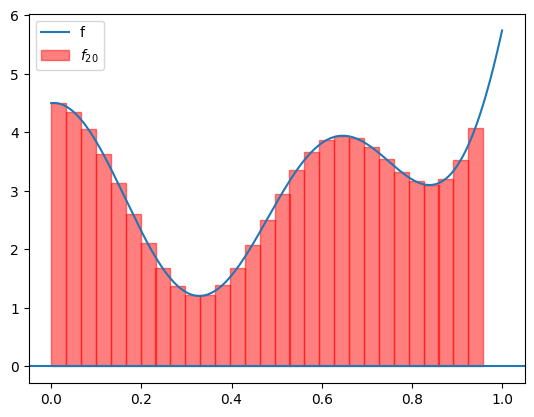

In [129]:
# リーマン積分

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


x = np.linspace(0, 1, 1000)

# 適当な関数 f
f = x ** 4 - 0.7 * x **2 + 0.1 * x + 1.5 * np.cos(10 * x) * 0.1 + 0.3
f = f * 10
plt.plot(x, f, label="f")
plt.axhline(y=0.0)

# リーマン積分の積分区間
n = 30
int_x = np.arange(0, 1000, int(1000 / n))

ax = plt.gca()
ax.add_patch(Rectangle((0, 0), 0, 0, color="r", alpha=0.5, label=r"$f_{20}$"))
for ix in range(n - 1):
    _x = x[int_x[ix]]
    ix = int((int_x[ix] + int_x[ix + 1]) / 2)
    y = f[ix]
    ax.add_patch(Rectangle((_x, 0), 1 / n, y, color="r", alpha=0.5))

plt.legend()

先程のリーマン積分では$[0, 1]$を等間隔に$n$個で分割し、その中の代表点を足し合わせていました。

ルベーグ積分では以下のような``単関数``を考えます。

$$
g_n(x) = \sum^n_{j=1} a_j {\bf 1}_{A_j} (x)
$$

これは $\forall x\in A_j$では$g_n(x)$の値が同じになるように、$[0, 1]$を$n$個の区間 $A_1, \dots, A_n$に分割しているわけです。
このように、ルベーグ積分ではリーマン積分とは分割の仕方が大きく異なります。

次のような単関数を考えると、各点で単調増加に$f$に収束するような関数を構築できます (ここで、$a_j = j / 2^n$です)：

$$
f_n(x) = \sum^{n 2^n}_{j=1} a_{j-1} {\bf 1}_{a_{j-1} \leq f < a_j}(x) + n {\bf 1}_{f \geq n} (x)
$$

つまり、第一項は $f$の値が$0, 1/2^n, 2/2^n, \dots, n$ の範囲をカバーし、第二項はそれ以外の場所をカバーします。
これは$n \to \infty$のときに$f$に収束します。そして、測度空間$(\Omega, \mathcal{F}, \mu)$上で定義された非負の実数値をとる可測関数$f$に対するルベーグ積分は

$$
\int_\Omega f(x) \mu(dx) = \lim_{n\to\infty} \int_\Omega f_n(x)\mu(dx)
$$

として定義されます。非負以外の実数値も取る可測関数$f$については$f_+ = \max(f, 0)$と$f_-=-\min(f, 0)$を使って

$$
\int_\Omega f(x) \mu(dx) = \int_\Omega f_+(x)\mu(dx) - \int_\Omega f_-(x)\mu(dx)
$$

とすればOK。

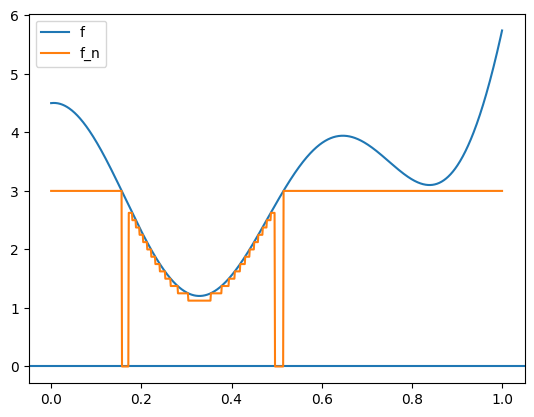

In [148]:
# ルベーグ積分

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


x = np.linspace(0, 1, 1000)

# 適当な関数 f
f = x ** 4 - 0.7 * x **2 + 0.1 * x + 1.5 * np.cos(10 * x) * 0.1 + 0.3
f = f * 10
plt.plot(x, f, label="f")
plt.axhline(y=0.0)

# リーマン積分の積分区間
n = 3
j = np.arange(n * 2 ** n)
a_j = j / 2 ** n

idx_f_geq_n = f > n

f_n = np.zeros(1000)
f_n += n * (f >= n)  # nより大きい点はnとおく

# それ以外の点は下から近似
for j in range(1, n * 2 ** n - 1):
    a_j_1 = (j - 1) / 2 ** n
    a_j = j / 2 ** n
    f_n += a_j_1 * (a_j_1 <= f) * (f < a_j)

plt.plot(x, f_n, label="f_n")
plt.legend()